# Read initial model and plot velocity in horizontal section

In [1]:
from pytomoatt.model import ATTModel
import numpy as np
# initial model hdf5 file
initial_model_file = '2_models/model_init_N7_201_201.h5'
# input parameters file
par_file = '3_input_params/input_params_inv.yaml'

# read model file by pytomoatt
model = ATTModel.read(initial_model_file, par_file)
initial_model = model.to_xarray()

# we can access the velocity at arbitrary depth
depth = 0.0
tmp = initial_model.interp_dep(depth, field='vel')
print("The shape of initial model array is ", tmp.shape)
longitude = tmp[:,0]
latitude = tmp[:,1]
vel = tmp[:,2]

The shape of initial model array is  (40401, 3)


# Pygmt plot

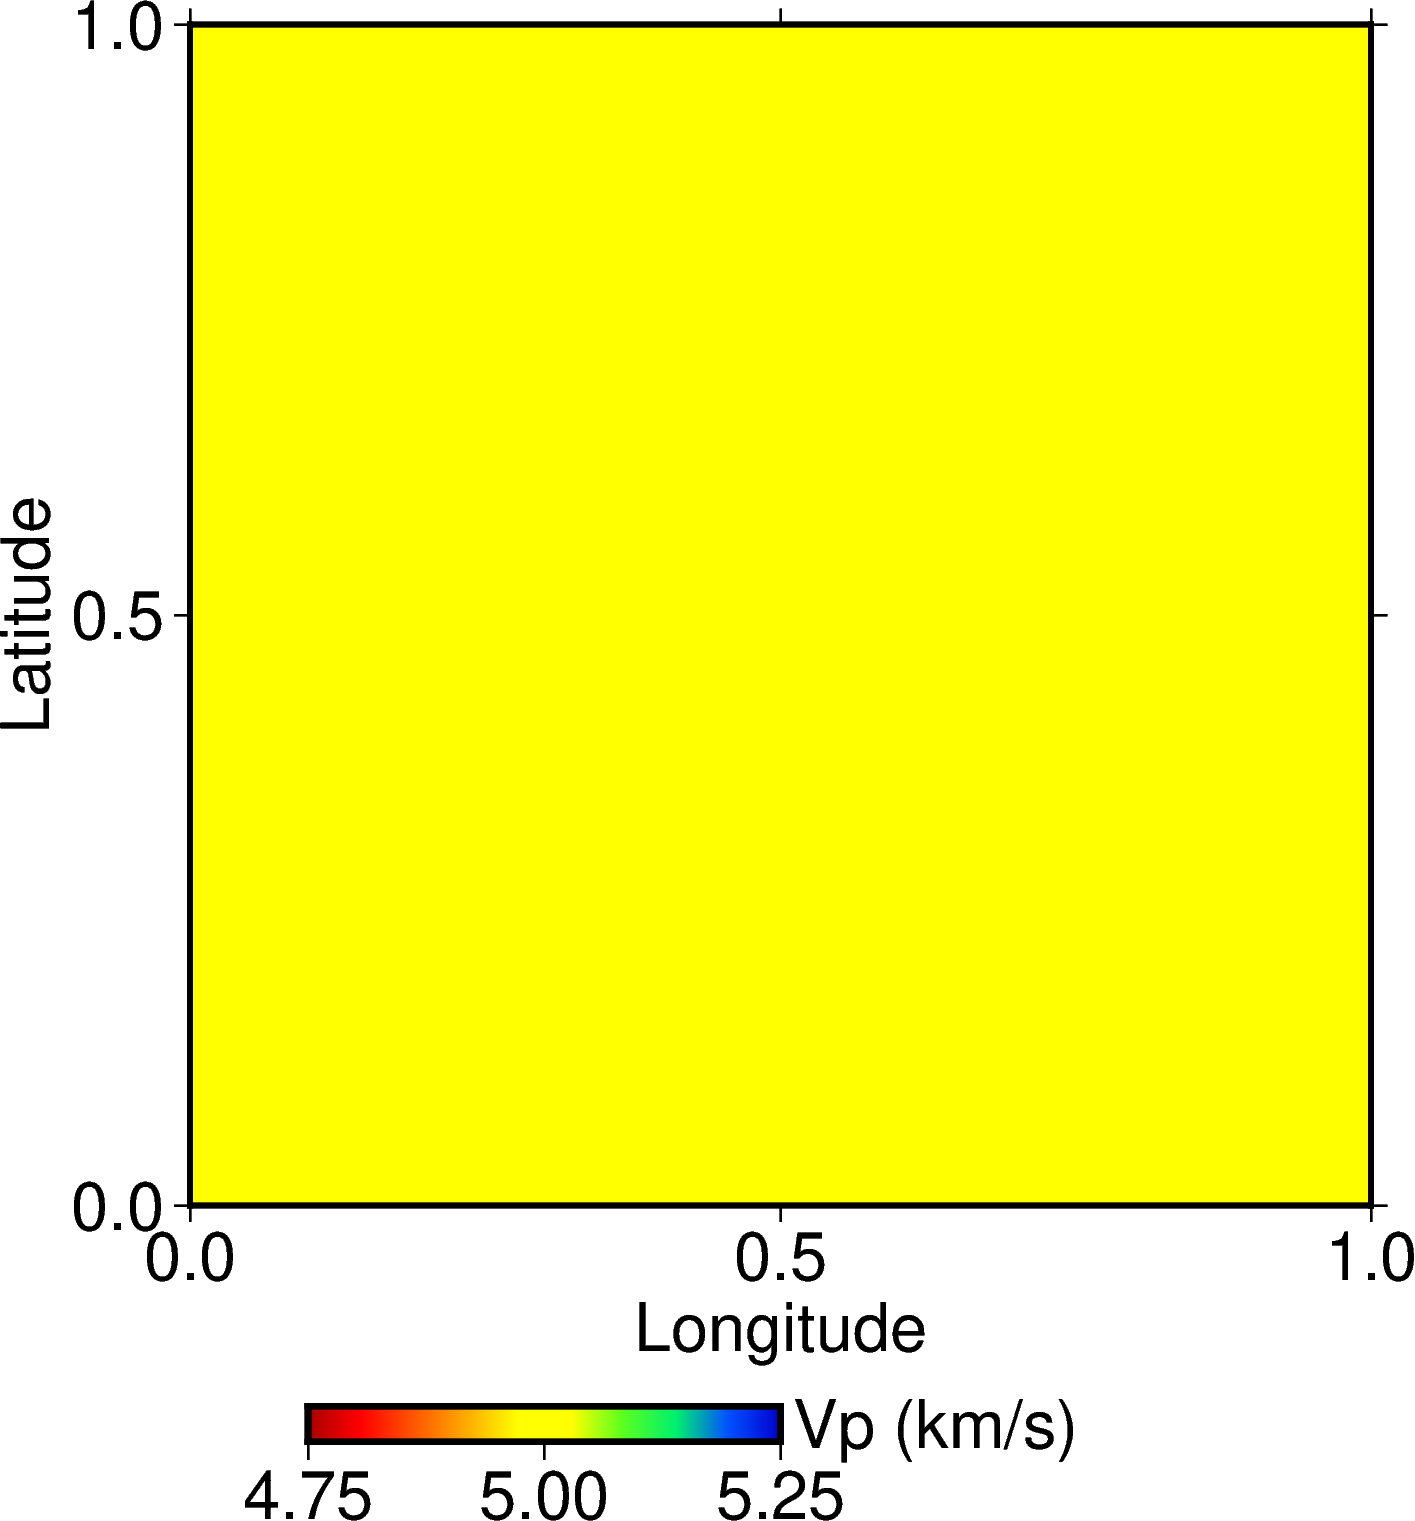

In [2]:
# pygmt plot
import pygmt
from pygmt.clib import Session
with pygmt.clib.Session() as session:
    session.call_module('gmtset', 'FONT 16p')
pygmt.config(IO_SEGMENT_MARKER="<<<")

region = [0,1,0,1]
projection = "X10c/10c"
frame = ["xa0.5+lLongitude", "ya0.5+lLatitude", "nSWe"]

fig = pygmt.Figure()
pygmt.makecpt(cmap="seis", series=[4.75, 5.25], background=True, reverse=False)
grid = pygmt.xyz2grd(x=longitude, y=latitude, z=vel, spacing=0.005,region=region,)

fig.grdimage(frame=frame,grid = grid,projection=projection, region=region) # nan_transparent may work

fig.shift_origin(xshift= 1, yshift=-2)
fig.colorbar(frame = ["a%f"%(0.25),"y+lVp (km/s)"], position="+w4c/0.3c+h") # +e,默认是双箭头，f表示forward，b表示background ，w表示长宽，h表示水平
fig.shift_origin(xshift=-1, yshift=+2)

fig.show()

fig.savefig('img/1a_initial_model.png')